In [94]:
import matplotlib.pyplot as plt
from pydicom import dcmread
import os
import numpy as np
import cv2
import skimage
from skimage import measure

In [95]:
def show_dicom_image(med_img, title=""):
    plt.figure(figsize=(15, 7))
    plt.imshow(med_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [96]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

In [97]:
def read_dicom_image(file_path):
    medical_image = dcmread(file_path)
    pixel_array = medical_image.pixel_array
    return medical_image, pixel_array

In [98]:
_ , original_image = read_dicom_image("../Database/2EFVJVCN/I1680000")

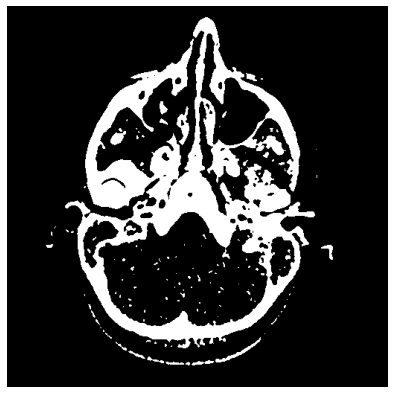

In [99]:
medical_image, pixel_array = read_dicom_image("../Database/2EFVJVCN-Osso/I1680000")

hu_image = transform_to_hu(medical_image, pixel_array)

show_dicom_image(hu_image)

In [100]:
print(pixel_array.min(), pixel_array.max())
labels_mask = measure.label(pixel_array)

regions = measure.regionprops(labels_mask)
regions.sort(key=lambda x: x.area, reverse=True)

if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = pixel_array.min()

labels_mask[labels_mask!=0] = pixel_array.max()
mask = labels_mask

0 2947


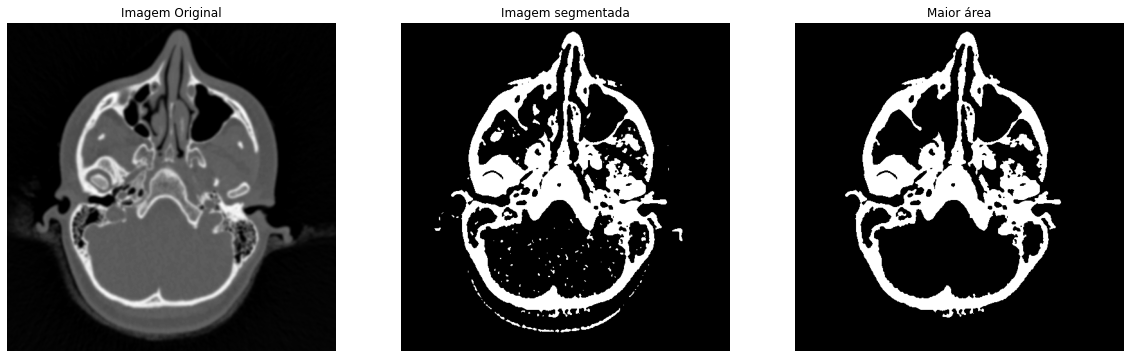

In [101]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title("Imagem Original")
plt.subplot(1,3,2)
plt.imshow(hu_image, cmap='gray')
plt.axis('off')
plt.title("Imagem segmentada")
plt.subplot(1,3,3)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Maior área")

plt.show()

In [102]:
print(mask.min(), mask.max())

0 2947


In [103]:
max_value = hu_image.max()
min_value = hu_image.min()

labels_mask = measure.label(hu_image)

regions = measure.regionprops(labels_mask)
regions.sort(key=lambda x: x.area, reverse=True)

if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0

labels_mask[labels_mask!=0] = 1
mask = labels_mask

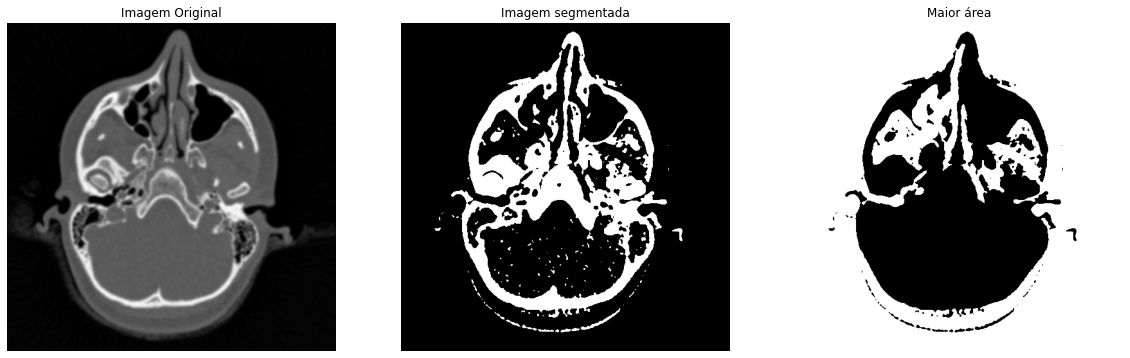

In [104]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title("Imagem Original")
plt.subplot(1,3,2)
plt.imshow(hu_image, cmap='gray')
plt.axis('off')
plt.title("Imagem segmentada")
plt.subplot(1,3,3)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Maior área")

plt.show()